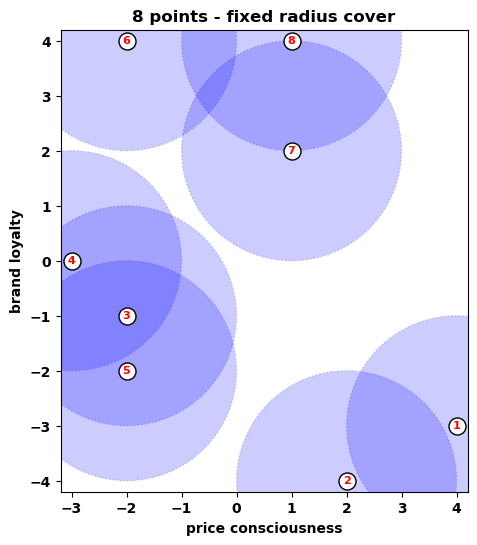

In [2]:
# works on pandas 1.5.3, numpy 1.24.3, matplotlib 3.6.2 and scipy 1.10.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.spatial.distance import cdist

eight = np.array(([-3, -2, -2, -2, 1, 1, 2, 4], [0, 4, -1, -2, 4, 2, -4, -3])).T
eight = eight[[7, 6, 2, 0, 3, 1, 5, 4], :]

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(0, 8):
    ax.scatter(eight[i, 0], eight[i, 1], c="w", edgecolor="black", s=150, zorder=10)
    ax.text(eight[i, 0], eight[i, 1], str(i + 1), zorder=15,
            horizontalalignment='center', verticalalignment='center', c="r", fontsize=8)

for x, y in eight:
    circle = plt.Circle((x, y), radius=2, color='blue', fill=True, linestyle='dotted', alpha = 0.2)
    ax.add_artist(circle)

ax.set_xlim(-3.2, 4.2)
ax.set_ylim(-4.2, 4.2)
ax.set_xlabel('price consciousness')
ax.set_ylabel('brand loyalty')
plt.title('8 points - fixed radius cover')
ax.set_aspect('equal')

plt.show()

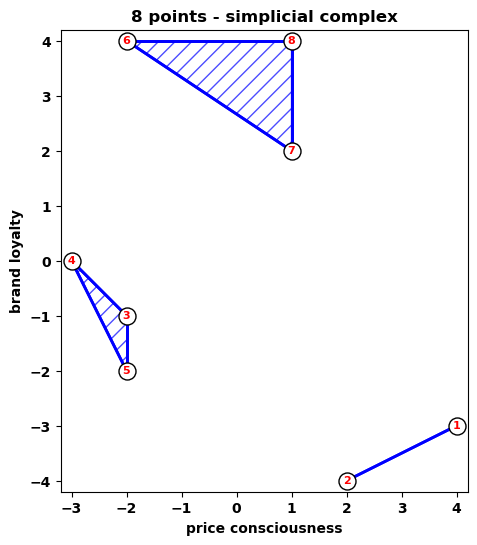

In [3]:
distances = cdist(eight, eight)

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(0, 8):
    ax.scatter(eight[i, 0], eight[i, 1], c="w", edgecolor="black", s=150, zorder=10)
    ax.text(eight[i, 0], eight[i, 1], str(i + 1), zorder=15,
            horizontalalignment='center', verticalalignment='center', c="r", fontsize=8)

for i, (x, y) in enumerate(eight):
    close_points = np.where(distances[i] < 4)[0]
    for j in close_points:
        ax.plot([x, eight[j, 0]], [y, eight[j, 1]], color='blue', alpha=1, linewidth=2)

A = eight[[5,6,7],:]
B = eight[[2,3,4],:]
polygonA = Polygon(A, closed=False, fill = False, color = "blue", hatch='//', alpha = 0.7)
polygonB = Polygon(B, closed=False, fill = False, color = "blue", hatch='//', alpha = 0.7)
ax.add_patch(polygonA)
ax.add_patch(polygonB)

ax.set_xlim(-3.2, 4.2)
ax.set_ylim(-4.2, 4.2)
ax.set_xlabel('price consciousness')
ax.set_ylabel('brand loyalty')
plt.title('8 points - simplicial complex')
ax.set_aspect('equal')

plt.show()